close    high     low    open   volume  \
symbol date                                                                 
GOOG   2016-04-28 00:00:00+00:00  691.02  714.17  689.55  708.26  2867255   
       2016-04-29 00:00:00+00:00  693.01  697.62  689.00  690.70  2487673   
       2016-05-02 00:00:00+00:00  698.21  700.64  691.00  697.63  1645265   
       2016-05-03 00:00:00+00:00  692.36  697.84  692.00  696.87  1543785   
       2016-05-04 00:00:00+00:00  695.70  699.75  689.01  690.49  1693525   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
GOOG   2016-04-28 00:00:00+00:00    691.02   714.17  689.55   708.26   
       2016-04-29 00:00:00+00:00    693.01   697.62  689.00   690.70   
       2016-05-02 00:00:00+00:00    698.21   700.64  691.00   697.63   
       2016-05-03 00:00:00+00:00    692.36   697.84  692.00   696.87   
       2016-05-04 00:00:00+00:00    695.70   699.75  689.01   690.49   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2016-04-28 00:00:00+00:00    2867255      0.0          1.0  
       2016-04-29 00:00:00+00:00    2487673      0.0          1.0  
       2016-05-02 00:00:00+00:00    1645265      0.0          1.0  
       2016-05-03 00:00:00+00:00    1543785      0.0          1.0  
       2016-05-04 00:00:00+00:00    1693525      0.0          1.0

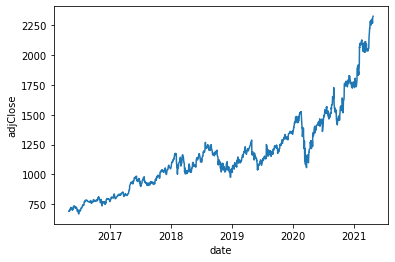

In [4]:
# 주가데이터
import pandas_datareader as pdr
import seaborn as sns

TINGO_API_KEY = "c179c68a459f2347a84e20f77926f6840a9150be"
df = pdr.get_data_tiingo('GOOG', api_key=TINGO_API_KEY)


sns.lineplot(x=df.index.levels[1], y="adjClose", data=df)
df.head()



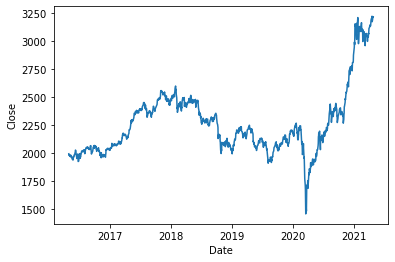

In [4]:
# 주가 지수 데이터
import pandas_datareader.data as web
import seaborn as sns

df = web.DataReader('^KOSPI', 'stooq')
sns.lineplot(x=df.index, y="Close", data=df)

In [1]:
# 환율데이터
import pandas_datareader.data as web

ALPHAVANTAGE_API_KEY = "c179c68a459f2347a84e20f77926f6840a9150be"
df_1 = web.DataReader("USD/KRW", "av-forex", api_key=ALPHAVANTAGE_API_KEY)
df_1.head()

,USD/KRW
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,KRW
To_Currency Name,South Korean Won
Exchange Rate,1122.38000000


In [15]:
# 주별, 월별 환율 얻을려 했는데 계속 Time 에러 뜸(왜 그럴까 고민중)
import pandas_datareader.data as web
from urllib.request import urlopen
import json
import pandas as pd

ALPHAVANTAGE_API_KEY = "c179c68a459f2347a84e20f77926f6840a9150be"
url = "https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol=KRW&outputsize=compact&apikey="+ALPHAVANTAGE_API_KEY

result = urlopen(url)
result_read = result.read()

df = pd.DataFrame(json.loads(result_read)["Time Series FX(Daily)"]).T
# Time Seriex FX(Daily)가 계속 keyerror뜸
df.head()

KeyError: 'Time Series FX(Daily)'

In [16]:
# 원자재 oil가격 
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 12, 31)

oil = web.DataReader('DCOILWTICO', 'fred', start, end)
oil.head()

,DCOILWTICO
DATE,
2015-01-01,NaN
2015-01-02,52.72
2015-01-05,50.05
2015-01-06,47.98
2015-01-07,48.69


In [18]:
# World Bank를 통한 GDP정보 search 함수를 이용해 데이터 코드 검색
from pandas_datareader import wb

wb.search('gdp.*capita.*const')

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9194,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9196,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9198,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
9199,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


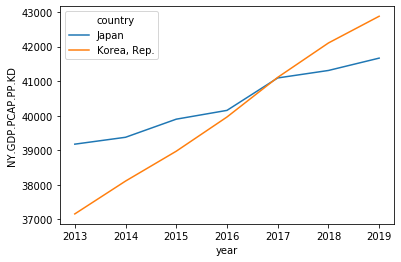

In [24]:
# 
from pandas_datareader import wb
import seaborn as sns

code = "NY.GDP.PCAP.PP.KD"
matches = wb.search('gdp.*capita.*const')
data = wb.download(indicator=code, country=['JPN', 'KOR'], start=2013, end=2019)
data = data.reset_index(drop=False)
sns.lineplot(x="year", y=code, hue="country", data=data)